In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

We load the data

In [2]:
df = pd.read_csv('california_housing_prices.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**EDA**

Load the data.

Look at the median_house_value variable. Does it have a long tail?

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

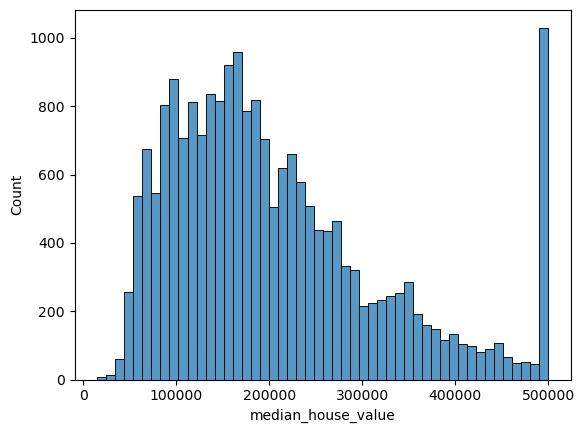

In [5]:
sns.histplot(df.median_house_value, bins=50)

No, it doesn't look as a long tail.

**Preparing the data**

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

Next, use only the following columns:

'latitude',

'longitude',

'housing_median_age',

'total_rooms',

'total_bedrooms',

'population',

'households',

'median_income',

'median_house_value'


In [20]:
df_subset = df[(df['ocean_proximity'] ==  '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]
del df_subset['ocean_proximity']
df_subset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


**Question 1**

There's one feature with missing values. What is it?

In [22]:
df_subset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

**Question 2**

What's the median (50% percentile) for variable 'population'?

In [24]:
df_subset['population'].median()

1195.0

**Prepare and split the dataset**

Shuffle the dataset (the filtered one you created above), use seed 42.

Split your data in train/val/test sets, with 60%/20%/20% distribution.

Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [26]:
n = len(df_subset)
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

In [28]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n_val, n_test, n_train

(3137, 3137, 9413)

In [31]:
df_train = df_subset.iloc[idx[:n_train]]
df_val = df_subset.iloc[idx[n_train:n_train+n_val]]
df_test = df_subset.iloc[idx[n_train+n_val:]]

In [33]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [35]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [36]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875
1,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125
2,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301
3,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422
4,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306


**Question 3**

■ We need to deal with missing values for the column from Q1.

■ We have two options: fill it with 0 or with the mean of this variable.

■ Try both options. For each, train a linear regression model without regularization using the code from the lessons.

■ For computing the mean, use the training only!

■ Use the validation dataset to evaluate the models and compare the RMSE of each option.

■ Round the RMSE scores to 2 decimal digits using round(score, 2)

■ Which option gives better RMSE?

In [37]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [38]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

**Filling with 0**

In [46]:
def prepare_X_zero(df):
    df_num = df.copy()
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [66]:
X_train = prepare_X_zero(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X_zero(df_val)
y_pred = w0 + X_val.dot(w)
print(round(rmse(y_val, y_pred),2))

0.34


**Filling with mean**

In [47]:
def prepare_X_mean(df):
    df_num = df.copy()
    col_means = df_num.mean()
    df_num = df_num.fillna(col_means)
    X = df_num.values
    return X

In [67]:
X_train = prepare_X_mean(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X_mean(df_val)
y_pred = w0 + X_val.dot(w)
print(round(rmse(y_val, y_pred),2))

0.34


**Question 4**

■ Now let's train a regularized linear regression.

■ For this question, fill the NAs with 0.

■ Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].

■ Use RMSE to evaluate the model on the validation dataset.

■ Round the RMSE scores to 2 decimal digits.

■ Which r gives the best RMSE?

If there are multiple options, select the smallest r.

In [56]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [63]:
print("\tr-value \tRMSE")
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X_zero(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X_zero(df_val)
    y_pred = w0 + X_val.dot(w)
    score = round(rmse(y_val, y_pred),2)
    
    print(f"\t{r} \t\t{score}")

	r-value 	RMSE
	0 		0.34
	1e-06 		0.34
	0.0001 		0.34
	0.001 		0.34
	0.01 		0.34
	0.1 		0.34
	1 		0.34
	5 		0.35
	10 		0.35


**Question 5** 


■ We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

■ Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

■ For each seed, do the train/validation/test split with 60%/20%/20% distribution.

■ Fill the missing values with 0 and train a model without regularization.

■ For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

■ What's the standard deviation of all the scores? To compute the standard deviation, use np.std.

■ Round the result to 3 decimal digits (round(std, 3))

In [64]:
def data_split(df_subset,s):
    df_subset = df_subset.copy()
    n = len(df_subset)
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)
    
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    
    df_train = df_subset.iloc[idx[:n_train]]
    df_val = df_subset.iloc[idx[n_train:n_train+n_val]]
    df_test = df_subset.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    return df_train, df_val, df_test, y_train, y_val, y_test
    

In [65]:
df_subset = df[(df['ocean_proximity'] ==  '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]
del df_subset['ocean_proximity']
df_subset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


In [70]:
RMSE_list = []
for i in range(10):
    df_train, df_val, df_test, y_train, y_val, y_test = data_split(df_subset,i)
    X_train = prepare_X_zero(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X_zero(df_val)
    y_pred = w0 + X_val.dot(w)
    RMSE_list.append(rmse(y_val, y_pred))

print(round(np.std(RMSE_list),3))

0.005


**Question 6**

■ Split the dataset like previously, use seed 9.

■ Combine train and validation datasets.

■ Fill the missing values with 0 and train a model with r=0.001.

■ What's the RMSE on the test dataset?

In [71]:
df_train, df_val, df_test, y_train, y_val, y_test = data_split(df_subset,9)

In [74]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X_zero(df_full_train)

In [75]:
y_full_train = np.concatenate([y_train, y_val])

In [77]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
X_test = prepare_X_zero(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
print(round(score,2))

0.33
